Script para realizar un análisis exploratorio básico (EDA) de los datasets
M5 Accuracy y Olist.  Cada función se encarga de cargar los archivos
necesarios, imprimir estadísticas descriptivas y graficar algunas
distribuciones clave.  Este código está pensado como punto de partida
para tu propio análisis; ajústalo según el tamaño de los datos y
requerimientos específicos.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


=== Cargando datasets M5... ===

-- Calendar --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
None
         date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1

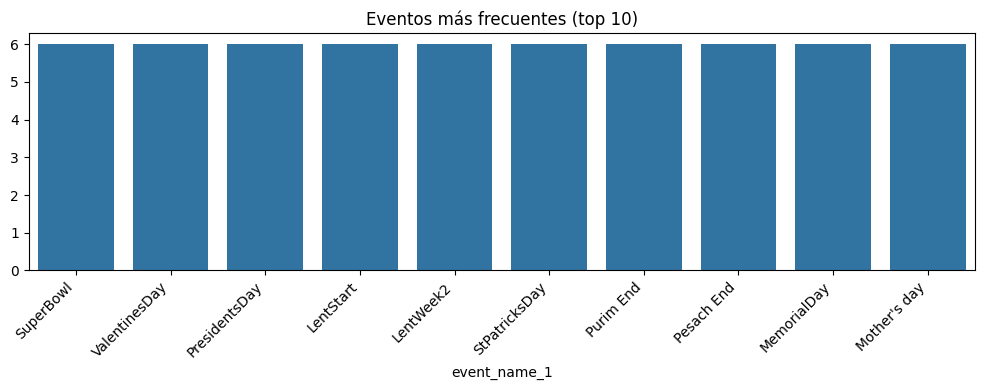

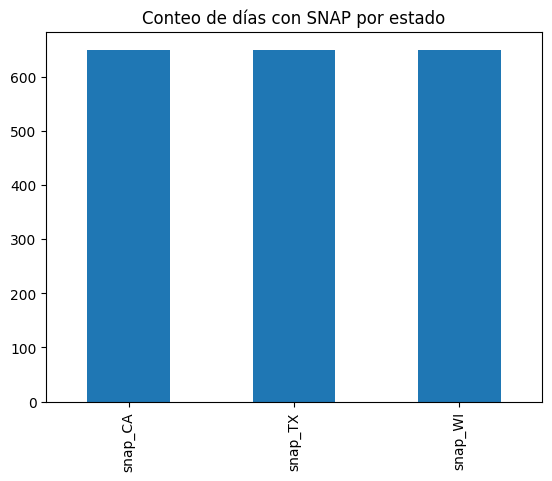

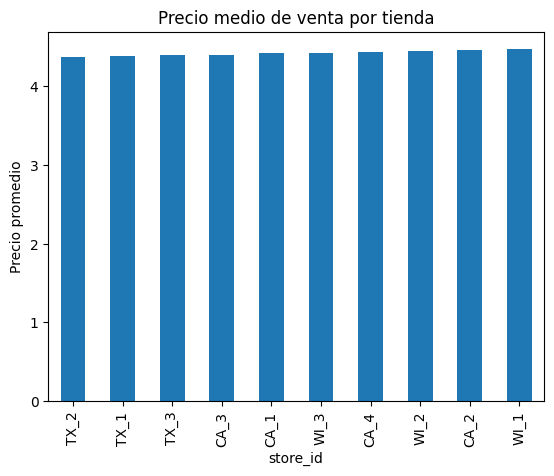


=== Fin del EDA básico de M5 ===


In [ ]:
def eda_m5(data_dir: str) -> None:
    """Realiza un EDA básico del dataset M5.

    Parameters
    ----------
    data_dir : str
        Ruta al directorio que contiene los archivos de M5 (`calendar.csv`,
        `sales_train_validation.csv` o `sales_train_evaluation.csv` y
        `sell_prices.csv`).

    Esta función carga los datos en memoria (ten en cuenta que
    `sales_train_validation.csv` es un archivo grande), imprime
    información general de las tablas y genera gráficos simples para
    visualizar tendencias y distribuciones.  Los gráficos se muestran
    directamente usando matplotlib; puedes guardar las figuras
    invocando plt.savefig dentro de la función si lo deseas.
    """
    # Verificar que los archivos existen
    cal_path = os.path.join(data_dir, "calendar.csv")
    sales_path = os.path.join(data_dir, "sales_train_validation.csv")
    prices_path = os.path.join(data_dir, "sell_prices.csv")

    for path in [cal_path, sales_path, prices_path]:
        if not os.path.exists(path):
            raise FileNotFoundError(f"Archivo no encontrado: {path}. Asegúrate de que el dataset está descargado.")

    print("\n=== Cargando datasets M5... ===")
    calendar = pd.read_csv(cal_path)
    # Cargar solo primeras filas de ventas para inspección rápida
    sales = pd.read_csv(sales_path, nrows=1000)
    prices = pd.read_csv(prices_path)

    # Mostrar información general
    print("\n-- Calendar --")
    print(calendar.info())
    print(calendar.head())

    print("\n-- Sales (muestra de 1.000 filas) --")
    id_cols = ['id','item_id','dept_id','cat_id','store_id','state_id']
    print(sales[id_cols].describe(include='all'))
    print(f"Número de columnas de ventas diarias: {sales.shape[1] - len(id_cols)}")

    print("\n-- Sell Prices --")
    print(prices.info())
    print(prices.head())

    # Graficar distribución de eventos y SNAP
    plt.figure(figsize=(10, 4))
    event_counts = calendar['event_name_1'].value_counts().head(10)
    sns.barplot(x=event_counts.index, y=event_counts.values)
    plt.title('Eventos más frecuentes (top 10)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Conteo de SNAP por estado
    snap_cols = ['snap_CA', 'snap_TX', 'snap_WI']
    snap_sums = calendar[snap_cols].sum()
    snap_sums.plot(kind='bar', title='Conteo de días con SNAP por estado')
    plt.show()

    # Gráfico de precios promedio por tienda
    sample_prices = prices.groupby('store_id')['sell_price'].mean()
    sample_prices.sort_values().plot(kind='bar', title='Precio medio de venta por tienda')
    plt.ylabel('Precio promedio')
    plt.show()

    print("\n=== Fin del EDA de M5 ===")

eda_m5(data_dir="./data/m5-acurracy")




=== Cargando datasets Olist... ===

-- Orders --
       order_status                       customer_id
count         99441                             99441
unique            8                             99441
top       delivered  9ef432eb6251297304e76186b10a928d
freq          96478                                 1
Pedidos únicos: 99441
Clientes únicos: 99441


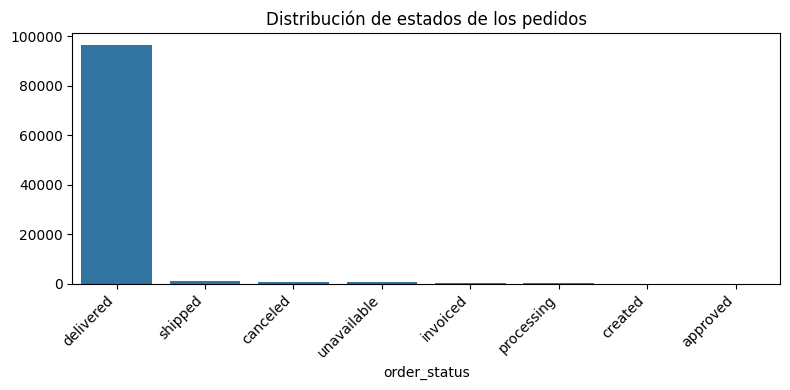

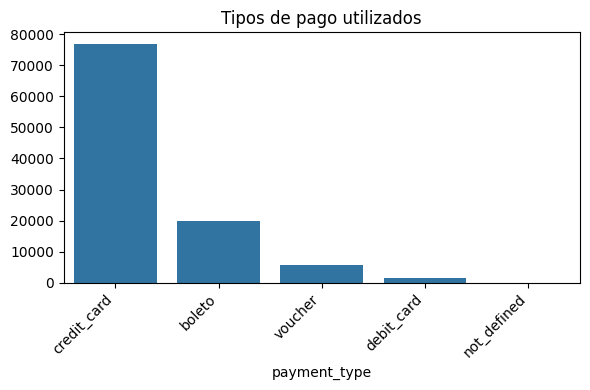

C:\Users\TOMYD\AppData\Local\Temp\ipykernel_21156\3641290307.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['delivery_time_days'] = (


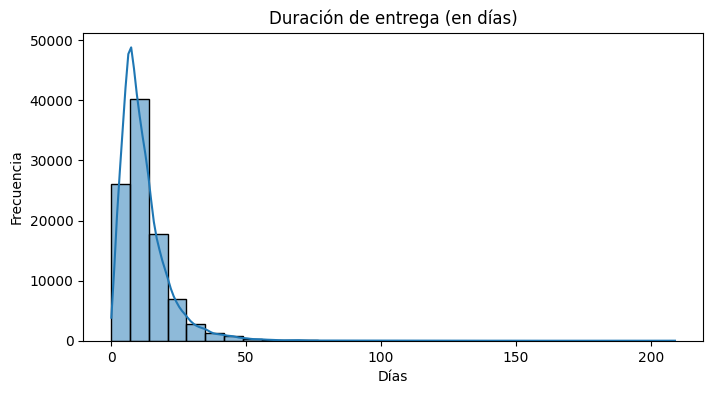

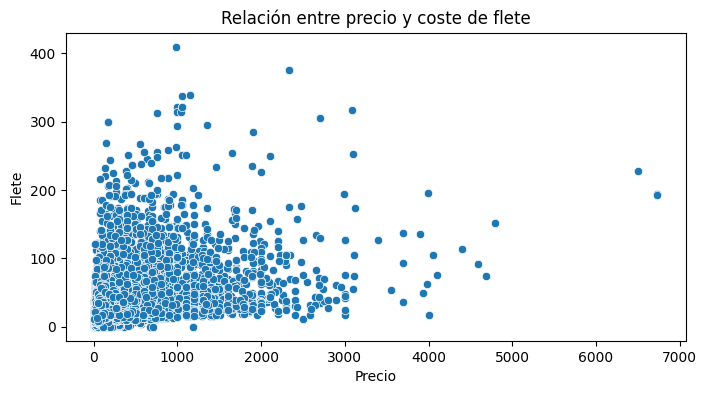


-- Reviews --
count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64


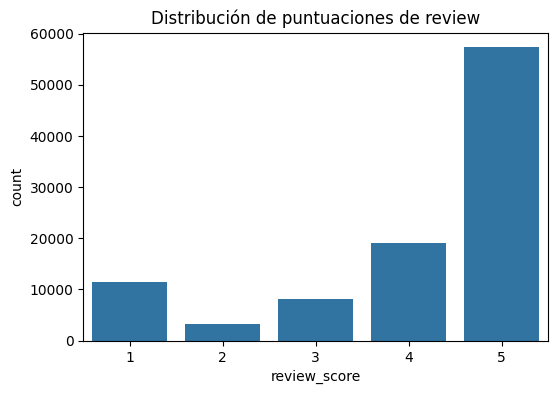


=== Fin del EDA básico de Olist ===


In [ ]:
def eda_olist(data_dir: str) -> None:

    required_files = [
        "olist_orders_dataset.csv",
        "olist_order_items_dataset.csv",
        "olist_order_payments_dataset.csv",
        "olist_order_reviews_dataset.csv",
        "olist_customers_dataset.csv",
        "olist_products_dataset.csv",
        "olist_sellers_dataset.csv",
        "olist_geolocation_dataset.csv",
    ]
    for fname in required_files:
        fpath = os.path.join(data_dir, fname)
        if not os.path.exists(fpath):
            raise FileNotFoundError(f"Archivo no encontrado: {fpath}")

    print("\n=== Cargando datasets Olist... ===")
    orders = pd.read_csv(os.path.join(data_dir, "olist_orders_dataset.csv"), parse_dates=[
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
    ])
    payments = pd.read_csv(os.path.join(data_dir, "olist_order_payments_dataset.csv"))
    reviews = pd.read_csv(os.path.join(data_dir, "olist_order_reviews_dataset.csv"), parse_dates=[
        'review_creation_date', 'review_answer_timestamp'
    ])
    items = pd.read_csv(os.path.join(data_dir, "olist_order_items_dataset.csv"))

    # Estadísticas básicas de órdenes
    print("\n-- Orders --")
    print(orders[['order_status', 'customer_id']].describe(include='all'))
    print(f"Pedidos únicos: {orders['order_id'].nunique()}")
    print(f"Clientes únicos: {orders['customer_id'].nunique()}")

    # Distribución de estados del pedido
    plt.figure(figsize=(8, 4))
    status_counts = orders['order_status'].value_counts()
    sns.barplot(x=status_counts.index, y=status_counts.values)
    plt.title('Distribución de estados de los pedidos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Distribución de tipos de pago
    plt.figure(figsize=(6, 4))
    pay_counts = payments['payment_type'].value_counts()
    sns.barplot(x=pay_counts.index, y=pay_counts.values)
    plt.title('Tipos de pago utilizados')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Calcular la duración de entrega para pedidos entregados
    delivered = orders.dropna(subset=['order_delivered_customer_date'])
    delivered['delivery_time_days'] = (
        delivered['order_delivered_customer_date'] - delivered['order_purchase_timestamp']
    ).dt.days
    plt.figure(figsize=(8, 4))
    sns.histplot(delivered['delivery_time_days'], bins=30, kde=True)
    plt.title('Duración de entrega (en días)')
    plt.xlabel('Días')
    plt.ylabel('Frecuencia')
    plt.show()

    # Precio y coste de flete por ítem
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=items['price'], y=items['freight_value'])
    plt.title('Relación entre precio y coste de flete')
    plt.xlabel('Precio')
    plt.ylabel('Flete')
    plt.show()

    # Resumen de opiniones
    print("\n-- Reviews --")
    print(reviews['review_score'].describe())
    plt.figure(figsize=(6, 4))
    sns.countplot(x='review_score', data=reviews)
    plt.title('Distribución de puntuaciones de review')
    plt.show()

    print("\n=== Fin del EDA de Olist ===")
eda_olist(data_dir="./data/olist")